# Math 382

## Homework 9
### Trevor Klar
### May 4th, 2017

In [77]:
def irange(start, stop, step=1):            # This is an inclusive range function, so that I don't have to remember
    if step == 1:                           # that range() leaves out the last value. 
        return range(start, stop+1)         #
    elif step < 0:                          #
        return range(start, stop-1, step)   #
    else:                                   #
        return range(start, stop+1, step)   #

def indeces(somelist):                   #returns a list of numbers from 0 to len(somelist), so I can easily iterate
    return range(len(somelist))          # with reference to the index of each element in the list

def linapprox(xlist, ylist, x):
    #estimates the value of a function using linear approximation, given a discreet mapping of x-values to y-values.
    for x_n in xlist:
        if x_n - x < 0:
            continue
        if x_n - x == 0:
            #print 'match:', x, 'is in list.'
            return ylist[xlist.index(x_n)]
        if x_n - x > 0:
            n = xlist.index(x_n)
            #print 'approximation:', x, 'is between', xlist[n-1],'and', xlist[n], '.'
            break
    try:
        x1, x2 = xlist[n-1], xlist[n]
        y1, y2 = ylist[n-1], ylist[n]
        return float((x-x1)*(y2-y1))/(x2-x1) + y1
    except:
        print 'ERROR: input', x, ' invalid. is it in the range ('+str(min(xlist))+','+str(max(xlist))+')?'

import matplotlib.pyplot as plt          # this is the
                                         # plot library
    
import numpy as np                       # not strictly necessary
                                         # but useful
    
import scipy, scipy.special, scipy.stats
    
%matplotlib inline                       
                                         # displays plots in the notebook
                                         # instead of popup windows
import math

import random

In [78]:
def cartesian(arrays, out=None):
    """
    Generate a cartesian product of input arrays.

    Parameters
    ----------
    arrays : list of array-like
        1-D arrays to form the cartesian product of.
    out : ndarray
        Array to place the cartesian product in.

    Returns
    -------
    out : ndarray
        2-D array of shape (M, len(arrays)) containing cartesian products
        formed of input arrays.

    Examples
    --------
    >>> cartesian(([1, 2, 3], [4, 5], [6, 7]))
    array([[1, 4, 6],
           [1, 4, 7],
           [1, 5, 6],
           [1, 5, 7],
           [2, 4, 6],
           [2, 4, 7],
           [2, 5, 6],
           [2, 5, 7],
           [3, 4, 6],
           [3, 4, 7],
           [3, 5, 6],
           [3, 5, 7]])

    """
    arrays = [np.asarray(x) for x in arrays]
    dtype = arrays[0].dtype

    n = np.prod([x.size for x in arrays])
    if out is None:
        out = np.zeros([n, len(arrays)], dtype=dtype)

    m = n / arrays[0].size
    out[:,0] = np.repeat(arrays[0], m)
    if arrays[1:]:
        cartesian(arrays[1:], out=out[0:m,1:])
        for j in xrange(1, arrays[0].size):
            out[j*m:(j+1)*m,1:] = out[0:m,1:]
    return out
def f(z):
    return z**5 - z**3 + z -1
def fprime(z):
    return 5*z**4 - 3*z**2 + 1
def iteration_function(z):
    return z - (f(z)/fprime(z))

In [92]:
#defines my domain matrix

size=500

x=np.linspace(-1,1,size)
y=x
domain=[complex(xn,yn) for xn in x for yn in y]
#complexdomain=[complex(num[i][0], num[i][1]) for i in domain]

In [142]:
AROUND20ITERATIONS = 20
VERYCLOSE = .001

def doesitconverge(z):
    for i in irange(1,AROUND20ITERATIONS):
        znext=iteration_function(z)
        if abs(z-znext) < VERYCLOSE: return i
        z = znext
    return 25

In [143]:
stepsMatrix = []
i=0

for row in range(size):
    stepsMatrix.append([])
    for col in range(size):
        #print 'i', i,
        #print 'row', row,
        #print 'value', doesitconverge(domain[i])
        stepsMatrix[row].append(doesitconverge(domain[i]))
        i+=1
        

In [144]:
#stepsMatrix[:50][:50]

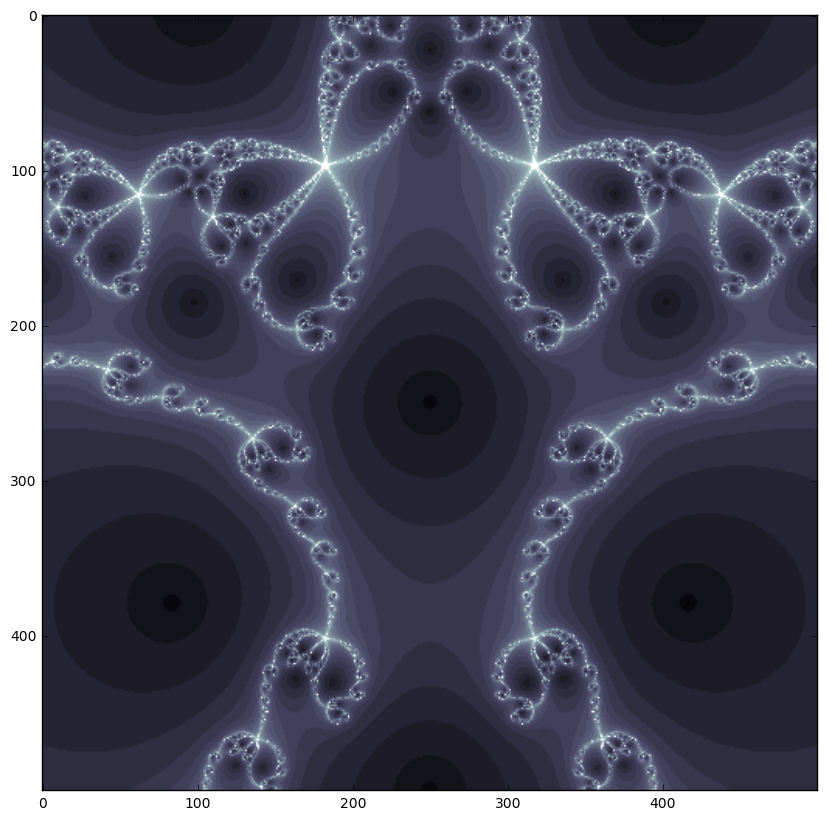

In [145]:
plt.imshow(stepsMatrix, cmap='bone');
fig=plt.gcf()
fig.set_size_inches(10,10)